# Классификация грибов

**Задача:** вы работаете на [Доктора Зло](https://ru.wikipedia.org/wiki/Доктор_Зло) и ваша обязанность найти ядовитые грибы, что бы сделать "лекарство" для [человека-загадки международного масштаба](https://www.kinopoisk.ru/film/5150/). Научитесь как можно больше и точнее классифицировать грибы для составления "лекарства" ...  

Classes (класс): edible(съедобный)=e, poisonous(ядовитый)=p)

-	cap-shape (форма шляпки): bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
-	cap-surface (поверхность шляпки): fibrous=f, grooves=g, scaly=y, smooth=s 
-	cap-color (цвет шляпки): brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
-	bruises (мятый ли гриб): bruises = t (истина), no =f (ложь)
-	odor (запах): almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
-	gill-attachment (гименофор): attached=a, descending=d, free=f, notched=n
-	gill-spacing: close=c, crowded=w, distant=d
-	gill-size: broad=b, narrow=n
-	gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e,white=w, yellow=y
-	stalk-shape (форма ножки): enlarging=e (расширяется), tapering=t (сужается)
-	stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
-	stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
-	stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
-	stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
-	stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
-	veil-type (тип пенека, вольвы, нижняя часть ножки): partial=p, universal=u
-	veil-color: brown=n, orange=o, white=w, yellow=y
-	ring-number (число колец на ножке): none=n, one=o, two=t
-	ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
-	spore-print-color (цвет спор гриба): black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
-	population (как растет гриб в грибнице): abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
  ![plot](/pict/mashroom_population.png)
-	habitat (место естественного произрастания): grasses=g (в траве), leaves=l (в листве), meadows=m (на лугах), paths=p (вблизи дороги), urban=u (в городе), waste=w (в мусоре), woods=d (на деревьях)
  ![plot2](/pict/mashroom.png)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import display
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('C:/Users/lizat/Downloads/mash_train.csv')
df_test = pd.read_csv('C:/Users/lizat/Downloads/mash_test_X.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,k,s,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
1,p,x,s,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
2,p,f,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
3,e,f,f,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,n,v,d
4,e,b,y,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,p,x,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
6495,e,k,y,e,t,n,f,c,b,w,...,s,w,e,p,w,t,e,w,c,w
6496,e,f,y,n,t,l,f,c,b,w,...,y,w,w,p,w,o,p,n,y,p
6497,p,k,s,e,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,p


In [3]:
df['class'] = df['class'].apply(lambda x: np.where(x == 'p',1,0))

In [4]:
for column in df.columns:
    print(df[column].unique())

[1 0]
['k' 'x' 'f' 'b' 's' 'c']
['s' 'y' 'f' 'g']
['e' 'n' 'y' 'g' 'w' 'b' 'p' 'r' 'c' 'u']
['f' 't']
['s' 'f' 'y' 'n' 'l' 'p' 'a' 'c' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['b' 'u' 'k' 'w' 'e' 'p' 'n' 'y' 'o' 'g' 'h' 'r']
['t' 'e']
['?' 'b' 'c' 'e' 'r']
['s' 'k' 'f' 'y']
['k' 's' 'f' 'y']
['p' 'w' 'g' 'o' 'n' 'e' 'b' 'c' 'y']
['w' 'p' 'g' 'n' 'o' 'b' 'e' 'c' 'y']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['e' 'p' 'l' 'n' 'f']
['w' 'n' 'h' 'k' 'b' 'y' 'u' 'r' 'o']
['v' 'n' 'y' 'c' 's' 'a']
['d' 'p' 'l' 'm' 'w' 'u' 'g']


In [5]:
df = df.replace('?',np.nan)
df = df.dropna().reset_index(drop=True)
display(df[df['class']==0].count()[0])
display(df[df['class']==1].count()[0]) # заметим, что классы находятся в соотношении примерно 8 : 5

2779

1713

In [6]:
color_dict = {'n': 'brown', 'b': 'goldenrod', 'c':'sienna', 'g': 'gray', 'r': 'green', 'p':'pink', 'u':'purple','e':'red', 
              'w':'white', 'y':'yellow','k':'black', 'h':'chocolate', 'o':'orange'}

for column in df.columns:
    if 'color' in column:
        df[column] = df[column].map(color_dict)
        df[column+'_r'] = df[column].map(lambda x: mcolors.to_rgb(x)[0])
        df[column+'_g'] = df[column].map(lambda x: mcolors.to_rgb(x)[1])
        df[column+'_b'] = df[column].map(lambda x: mcolors.to_rgb(x)[2])
        df.drop(column,axis=1,inplace=True)

In [7]:
num_dict = {'n': 0, 'o': 1, 't': 2}
df['ring-number'] = df['ring-number'].map(num_dict)

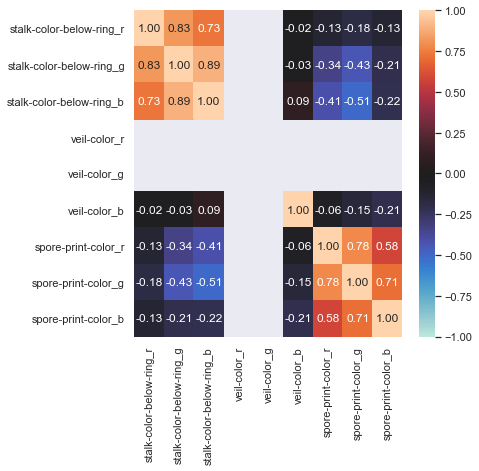

In [8]:
plt.figure(figsize=(6,6))
          
corr_matrix = df.iloc[:,-9:].corr()
sns.heatmap(corr_matrix,vmin = -1, vmax = 1,
            annot=True, fmt='.2f', center=0);

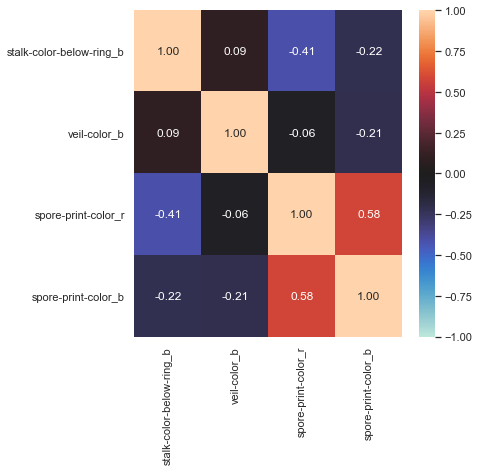

In [9]:
# удалим сильно коррелированные столбцы, чтобы избавиться от лишних фич

df.drop(['veil-color_r','veil-color_g','stalk-color-below-ring_r','spore-print-color_g','stalk-color-below-ring_g'],axis=1,inplace = True)

plt.figure(figsize=(6,6))
          
corr_matrix = df.iloc[:,-4:].corr()
sns.heatmap(corr_matrix,vmin = -1, vmax = 1,
            annot=True, fmt='.2f', center=0);

In [10]:
data = df.drop(columns='class')
target = df['class']

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

ct = ColumnTransformer([
      ('label', OneHotEncoder(),
      make_column_selector(dtype_include=object))
      ],
      remainder='passthrough')

ct.fit(data)
data = ct.transform(data)
data = pd.DataFrame(data, columns = ct.get_feature_names_out())
data

,label__cap-shape_b,label__cap-shape_c,label__cap-shape_f,label__cap-shape_k,label__cap-shape_s,label__cap-shape_x,label__cap-surface_f,label__cap-surface_g,label__cap-surface_s,label__cap-surface_y,...,remainder__gill-color_r,remainder__gill-color_g,remainder__gill-color_b,remainder__stalk-color-above-ring_r,remainder__stalk-color-above-ring_g,remainder__stalk-color-above-ring_b,remainder__stalk-color-below-ring_b,remainder__veil-color_b,remainder__spore-print-color_r,remainder__spore-print-color_b
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.501961,0.000000,0.501961,0.501961,0.501961,0.501961,0.796078,1.0,0.647059,0.164706
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.647059,0.164706
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,0.501961,0.501961,0.501961,0.501961,1.0,0.647059,0.164706
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.752941,0.796078,1.000000,0.752941,0.796078,0.164706,1.0,0.823529,0.117647
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.647059,0.164706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.501961,0.501961,0.501961,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
4488,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.501961,0.000000,0.501961,0.501961,0.501961,0.501961,0.501961,1.0,0.647059,0.164706
4489,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.752941,0.796078,0.501961,0.501961,0.501961,0.796078,1.0,0.647059,0.164706
4490,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.823529,0.411765,0.117647,1.000000,1.000000,1.000000,1.000000,1.0,0.823529,0.117647


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [13]:
# попробуем запустить с параметрами наугад

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_features='sqrt', min_samples_leaf=5, n_estimators=100, random_state=42) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test))) # модель работает очень хорошо, поэтому
                                                                                      # оставляем как есть
y_best = forest.predict(X_test)

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 1.000


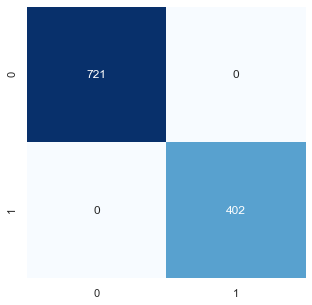

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,5))
ax = plt.subplot(1, 1, 1)
matrix=confusion_matrix(y_test,y_best)
sns.heatmap(matrix,annot=True, fmt='g', cbar=None,cmap="Blues");

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_best)) # посмотрим, что там у нас с precision (т.к. нам нужна именно эта метрика)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       721
           1       1.00      1.00      1.00       402

    accuracy                           1.00      1123
   macro avg       1.00      1.00      1.00      1123
weighted avg       1.00      1.00      1.00      1123



In [16]:
### Слот для внешних данных (которые подгрузили в блоке 1)

df_test = df_test.replace('?',np.nan)
df_test = df_test.dropna().reset_index(drop=True)

## В целом для этих данных можно было взять обычный OneHot по всем столбцам, но это увеличивает количество фич
## Если бы колонок с цветами и самих цветов было бы много, то лучше использовать как раз RGB преобразование

color_dict = {'n': 'brown', 'b': 'goldenrod', 'c':'sienna', 'g': 'gray', 'r': 'green', 'p':'pink', 'u':'purple','e':'red', 
              'w':'white', 'y':'yellow','k':'black', 'h':'chocolate', 'o':'orange'}


for column in df_test.columns:
    if 'color' in column:
        df_test[column] = df_test[column].map(color_dict)
        df_test[column+'_r'] = df_test[column].map(lambda x: mcolors.to_rgb(x)[0])
        df_test[column+'_g'] = df_test[column].map(lambda x: mcolors.to_rgb(x)[1])
        df_test[column+'_b'] = df_test[column].map(lambda x: mcolors.to_rgb(x)[2])
        df_test.drop(column,axis=1,inplace=True)

num_dict = {'n': 0, 'o': 1, 't': 2}
df_test['ring-number'] = df_test['ring-number'].map(num_dict)

df_test.drop(['veil-color_r','veil-color_g','stalk-color-below-ring_r','spore-print-color_g','stalk-color-below-ring_g'],axis=1,inplace = True)
X_test = ct.transform(df_test)
X_test = pd.DataFrame(X_test, columns = ct.get_feature_names_out())

y_best_t=forest.predict(X_test)

In [17]:
y_best_t # score нужно смотреть по presicion

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)